# Haberman's Survival Data Set:
 
The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.
 
 
 
 this data set have 4 attribute mention bellow:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
        1 = the patient survived 5 years or longer
        2 = the patient died within 5 year


objective:
        
objective is to predict whether the patient will survive after 5 years or not based upon the patient’s age, year of treatment and the number of positive lymph nodes.


Declaration:

Hear I have changed the name of the coloumn as per the attribute for better understanding.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

haberman = pd.read_csv("haberman.csv",names=['Age','Op_Year','axil_nodes','Surv_status'])


# Number of  features

In [5]:
haberman.columns

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')

# Number of classes & data-points per class.

In [6]:
print(haberman.shape)
haberman['Surv_status']=haberman['Surv_status'].map({1:'the patient survived 5 years or longer', 2:'the patient died within 5 year'})
haberman['Surv_status'].value_counts()


(306, 4)


the patient survived 5 years or longer    225
the patient died within 5 year             81
Name: Surv_status, dtype: int64

Observation:

1. Total patients are 306 
2. 225 patients out of 306 survived more than 5 years
3. 81 patients out of 306  died within 5 year 

# 2D scatter

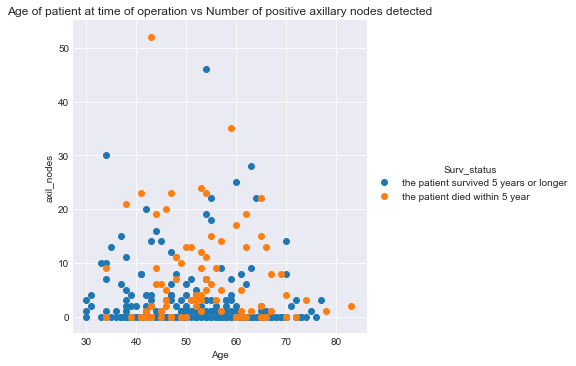

In [7]:
sns.set_style("darkgrid")
sns.FacetGrid(haberman, hue="Surv_status", size=5).map(plt.scatter, "Age", "axil_nodes").add_legend()
plt.title("Age of patient at time of operation vs Number of positive axillary nodes detected")
plt.show()

Observation:

1. Here I have ploted Surv_status using Age and axil_nodes features.
2. I found there is overlapping between the patient survived 5 years or longer and the patient died within 5 year so the classifiaction      between both is not possible

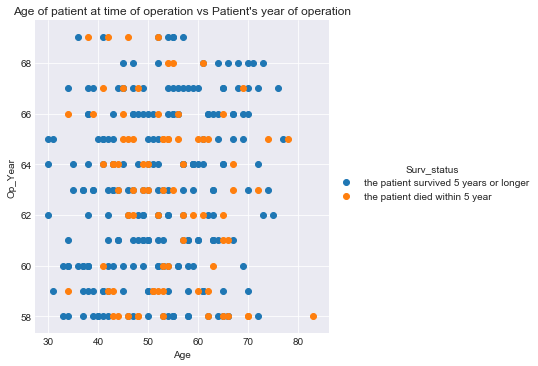

In [8]:
sns.set_style("darkgrid")
sns.FacetGrid(haberman, hue="Surv_status", size=5).map(plt.scatter, "Age", "Op_Year").add_legend()
plt.title("Age of patient at time of operation vs Patient's year of operation")
plt.show()

Observation:

1. Here I have ploted Surv_status using Age and Op_Year features.
2. Here also I found the overlapping between the patient survived 5 years or longer and the patient died within 5 year so the            classifiaction between both is not possible

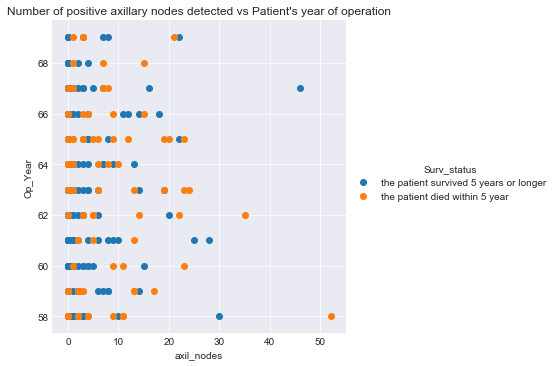

In [9]:
sns.set_style("darkgrid")
sns.FacetGrid(haberman, hue="Surv_status", size=5).map(plt.scatter, "axil_nodes", "Op_Year").add_legend()
plt.title("Number of positive axillary nodes detected vs Patient's year of operation")
plt.show()

Observation:

1. Here I have ploted Surv_status using axil_nodes and Op_Year features.
2. Here also same ,the overlapping between the patient survived 5 years or longer and the patient died within 5 year so large      that classifiaction between both is not possible

# Pairplots

To undersatand which feature will give more accurate result to distinguish between the patient survived 5 years or longer and the patient died within 5 year amongst all, i have done Pairplots.

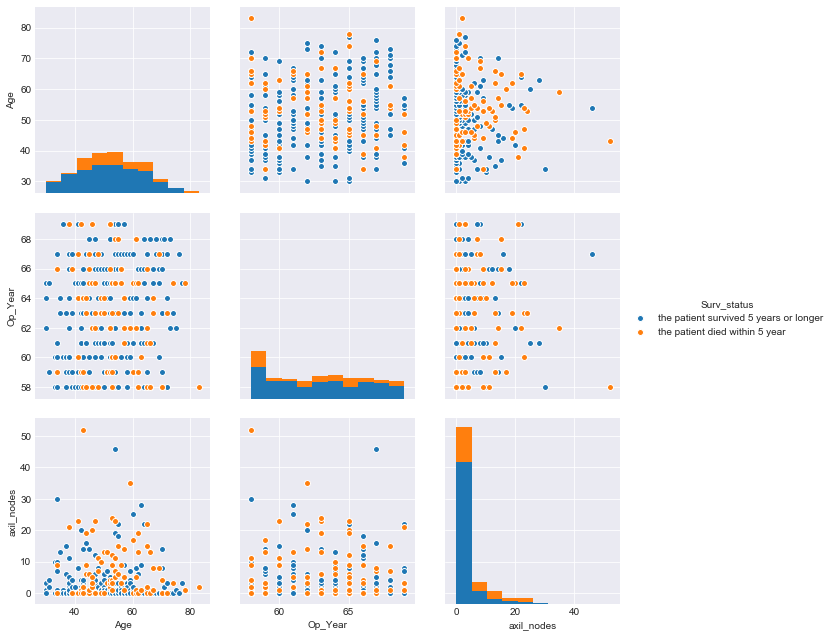

In [10]:
plt.close()
sns.set_style("darkgrid")
sns.pairplot(haberman, vars = ["Age", "Op_Year", "axil_nodes"],hue="Surv_status", size=3)
plt.show()

Observation:

The plot between Age vs axil_nodes is better than all other plots comparatively though it still have overlapping between the patient survived 5 years or longer and the patient died within 5 year  .

# 1D-Scatter Plots

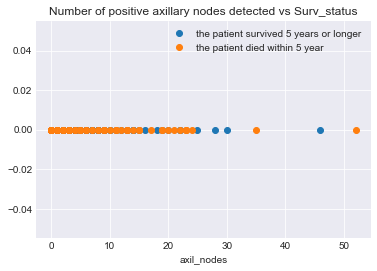

In [11]:
Haberman_Survival_Set = haberman[haberman['Surv_status']=='the patient survived 5 years or longer']
Haberman_NonSurvival_Set = haberman[haberman['Surv_status']=='the patient died within 5 year']

plt.plot(Haberman_Survival_Set["axil_nodes"], np.zeros_like(Haberman_Survival_Set['axil_nodes']), 'o')
plt.plot(Haberman_NonSurvival_Set["axil_nodes"], np.zeros_like(Haberman_NonSurvival_Set['axil_nodes']), 'o')
plt.legend(['the patient survived 5 years or longer', 'the patient died within 5 year'])

plt.xlabel("axil_nodes")
plt.title("Number of positive axillary nodes detected vs Surv_status")
plt.show()

Observation:

Here it has been observed that the patient died within 5 years are mostly overlap on the patient survived 5 years or longer so that we will not able to conclude anything from this plot.

becauce of this I have ploted PDF and CDF of each features(Age,axil_nodes,Op_Year) to get better clarification.

# PDF of Age

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


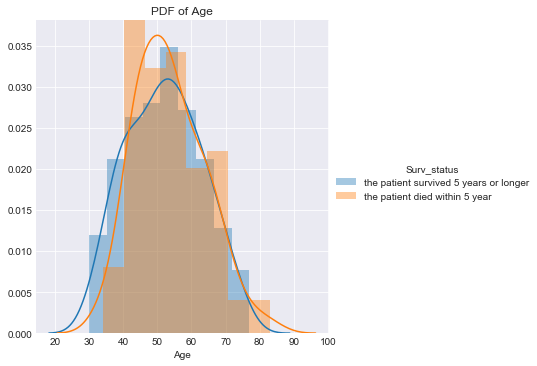

In [13]:
plt.close()
sns.FacetGrid(haberman, hue="Surv_status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.title("PDF of Age")
plt.show()


Observation:

Here it has been observe that the PDF of patient survived 5 years are almost same as the patient survived 5 years or longer  so that  we will not able to conclude anything from this plot.


# PDF of Op_Year

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


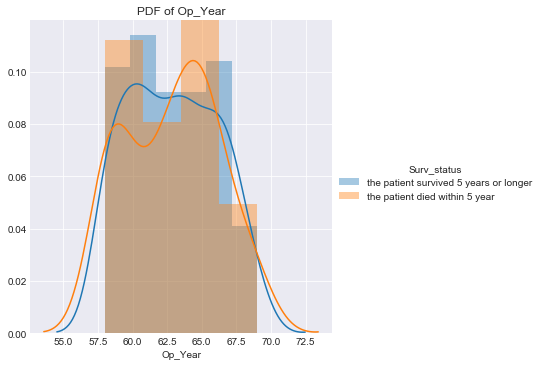

In [14]:

plt.close();
sns.FacetGrid(haberman, hue="Surv_status", size=5) \
   .map(sns.distplot, "Op_Year") \
   .add_legend();
plt.title("PDF of Op_Year")
plt.show()


Observation:

Here also the PDF of patient survived 5 years are almost same as the patient survived 5 years or longer  so that  we will not able to conclude anything from this plot.

#  PDF of axil_nodes

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


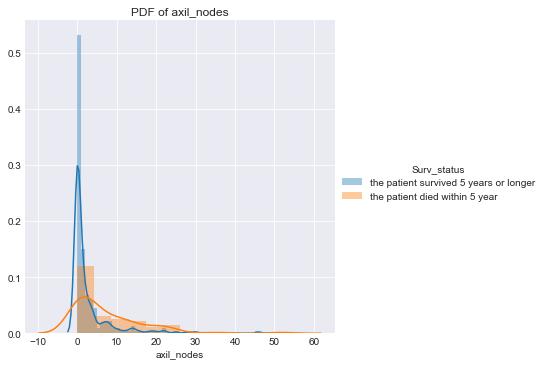

In [15]:
plt.close();
sns.FacetGrid(haberman, hue="Surv_status", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.title("PDF of axil_nodes")
plt.show()

Observation:

1. Here it has been observed that people survive long if they have less axillary nodes detected so that we can conclude this is    the best graph among all.

2. if(axil_nodes≤3(approx))
         survival rates =high
   elif(axil_nodes>3(approx))
         survival rates =low
   


# CDF of Haberman_Survival_Set

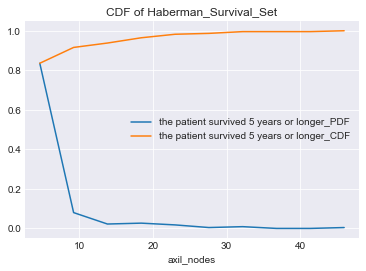

In [31]:
counts, bin_edges = np.histogram(Haberman_Survival_Set['axil_nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['the patient survived 5 years or longer_PDF', 'the patient survived 5 years or longer_CDF'])
plt.xlabel("axil_nodes")
plt.title("CDF of Haberman_Survival_Set")
plt.show()


Observation:

1. it has been observed that more than  80% of people have good chances of survival if they have less number of auxillary nodes       detected.

2. if nodes increases the survival status also decreases 

3. 100% of people have less chances of survival if nodes increases >40


#  CDF of Haberman_NonSurvival_Set

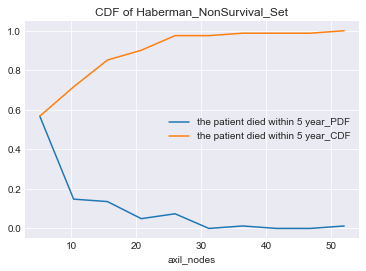

In [32]:
plt.close()
counts, bin_edges = np.histogram(Haberman_NonSurvival_Set['axil_nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['the patient died within 5 year_PDF', 'the patient died within 5 year_CDF'])
plt.xlabel("axil_nodes")
plt.title("CDF of Haberman_NonSurvival_Set")
plt.show()

Observation:

1. it has been observed that less than  60% of people have chances of death if they have less number of auxillary nodes       detected.

2. if nodes increases the death rate also increases 

3. 100% of people have more chances of death if nodes increases >40


# CDF for both features

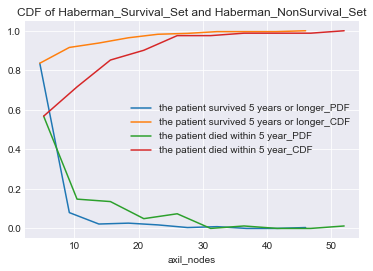

In [18]:
counts, bin_edges = np.histogram(Haberman_Survival_Set['axil_nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(Haberman_NonSurvival_Set['axil_nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(['the patient survived 5 years or longer_PDF', 'the patient survived 5 years or longer_CDF','the patient died within 5 year_PDF', 'the patient died within 5 year_CDF'])
plt.xlabel("axil_nodes")
plt.title("CDF of Haberman_Survival_Set and Haberman_NonSurvival_Set")
plt.show()

Observation:

1. it has been observed that  more than  80% of people have good chances of survival if they have less number of auxillary    nodes detected and less than  60% of people have chances of death if they have less number of auxillary nodes detected.

2. if nodes increases the death rate also increases 

3. 100% of people have less chances of survival if nodes increases >40 so that people have more chances of death if nodes    increases >40

  

# Mean and Std-dev

In [33]:

print("Means:")
print('Mean value of Haberman_Survival_Set:',np.mean(Haberman_Survival_Set["axil_nodes"]))
print('Mean value of Haberman_NonSurvival_Set:',np.mean(Haberman_NonSurvival_Set["axil_nodes"]))

print("\nStd-dev:");
print('Std-dev value of Haberman_Survival_Set:',np.std(Haberman_Survival_Set["axil_nodes"]))
print('Std-dev value of Haberman_NonSurvival_Set',np.std(Haberman_NonSurvival_Set["axil_nodes"]))





Means:
Mean value of Haberman_Survival_Set: 2.7911111111111113
Mean value of Haberman_NonSurvival_Set: 7.45679012345679

Std-dev:
Std-dev value of Haberman_Survival_Set: 5.857258449412131
Std-dev value of Haberman_NonSurvival_Set 9.128776076761632


Observation:

1. it has been observed that Avg rate of Survival with respect to axil_nodes is leser than Avg rate of Death

2. the spread of data for Death is more than Survival.

# Median & Quantile

In [28]:
print("\nMedians:")
print('Median value of Haberman_Survival_Set:',np.median(Haberman_Survival_Set["axil_nodes"]))
print('Median value of Haberman_NonSurvival_Set:',np.median(Haberman_NonSurvival_Set["axil_nodes"]))

print("\nQuantiles:")
print('Quantiles value of Haberman_Survival_Set:',np.percentile(Haberman_Survival_Set["axil_nodes"],np.arange(0, 100, 25)))
print('Quantiles value of Haberman_NonSurvival_Set:',np.percentile(Haberman_NonSurvival_Set["axil_nodes"],np.arange(0, 100, 25)))




Medians:
Median value of Haberman_Survival_Set: 0.0
Median value of Haberman_NonSurvival_Set: 4.0

Quantiles:
Quantiles value of Haberman_Survival_Set: [0. 0. 0. 3.]
Quantiles value of Haberman_NonSurvival_Set: [ 0.  1.  4. 11.]


Observation:

1. it has been observed that Avg axil_nodes for long Survival  is 0 and Avg axil_nodes for Death is 4

2. in case of 50% long Survival axil_node is 0 and for 75% long Survival axil_node is 3.

3. in case of 50% Death, axil_node is 4 and for 75% Death axil_node is 11.

# Box Plot and Whiskers

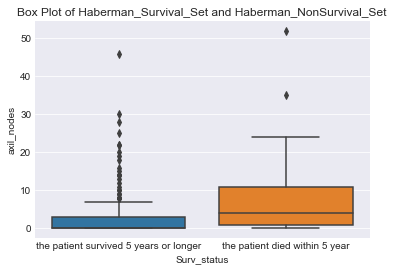

In [85]:
sns.boxplot(x='Surv_status',y='axil_nodes', data=haberman)
plt.title("Box Plot of Haberman_Survival_Set and Haberman_NonSurvival_Set")
plt.show()

Observation:

1. Boxplot of the patient survived 5 years or longer had only 75th percentile value which is overlapping with 50 % value of the    patient died within 5 year
2. threshold for the patient survived 5 years or longer is 0 to less than 10 and  Threshold for the patient died within 5 year   is 0 to more than 20 and less than 30.

# Violin Plot

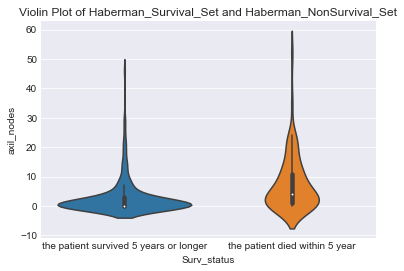

In [86]:
sns.violinplot(x="Surv_status", y="axil_nodes", data=haberman, size=8)
plt.title("Violin Plot of Haberman_Survival_Set and Haberman_NonSurvival_Set")
plt.show()

Observation:

1. 50th percentile of the patient survived 5 years or longer have 0 positive nodes
2. 50th percentile of the patient died within 5 year have axilary nodes below 5


# Conclusion

1. from the analysis we can conclude that Survival chances are more if number of positive axillary nodes detected is less.
2. Our objective is to predict whether the patient will survive after 5 years or not based upon the patient’s age, year of treatment and the number of positive lymph nodes which is difficult to conclude from these data set